In [82]:
# 22k4080

# TASK 1:

In [87]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("CC General.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

C:\Users\worka\AppData\Local\Temp\ipykernel_3988\2041803642.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
C:\Users\worka\AppData\Local\Temp\ipykernel_3988\2041803642.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

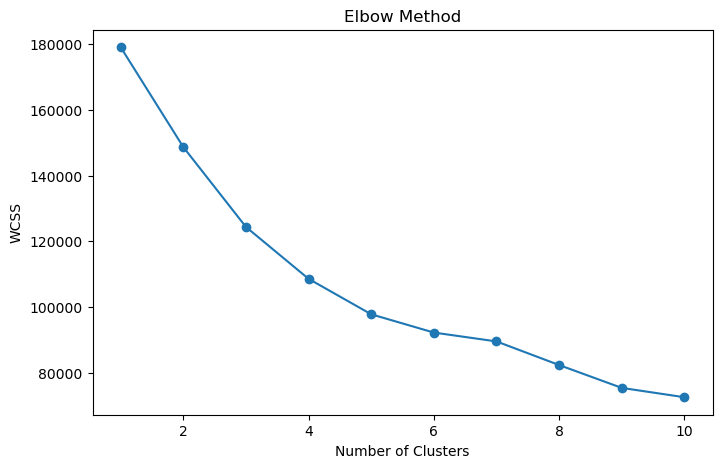

             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0        1438.488466           0.971976   2292.024698       1732.639071   
1        1167.549715           0.808699    257.694181        207.946941   
2        3783.251252           0.987869   6628.812910       3773.466316   
3        4875.635110           0.966384    519.069384        325.667965   
4         663.905306           0.894901    817.033273        174.660293   
5        5405.330935           0.957955  27276.363750      21877.102917   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    559.385627    301.744230             0.900896   
1                     49.887948    708.552415             0.154377   
2                   2857.204180    679.681146             0.955728   
3                    193.507547   5054.267066    

In [99]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

features = df.drop(['CUST_ID'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means Clustering
# Choosing optimal number of clusters (from the elbow curve, k=6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

print(cluster_summary)

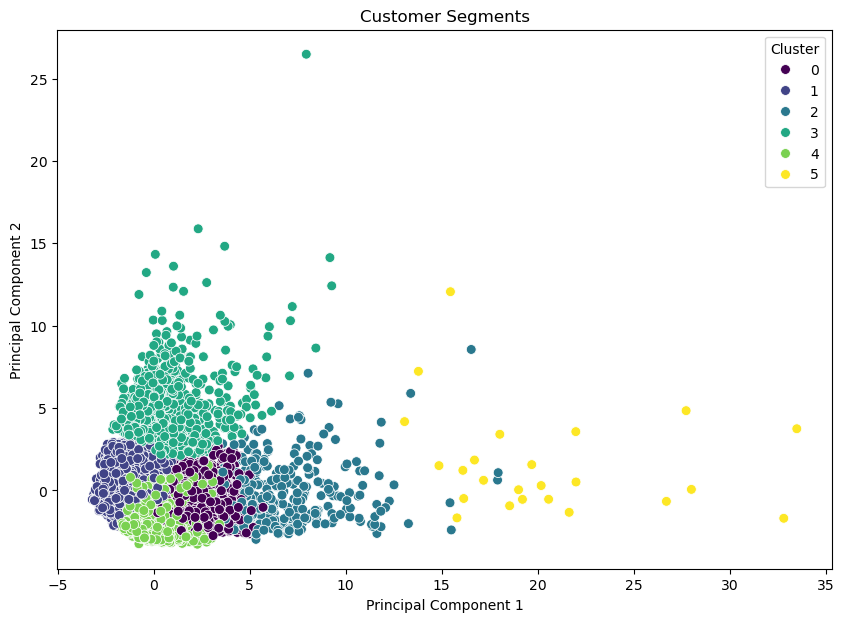

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

- Clusters that are closely grouped represent customer segments that share similar financial behaviors.
- They Might Have Similar ranges of balances, purchases, and payment behaviors.

- While Cluster 3 and 5 are spread apart, means these clusters consist of customers with distinctly different behaviors from the main group.

**Cluster 3:** Might include high-spending customers with significant balances, cash advances, or payments. They could represent premium customers or high-risk users.

**Cluster 5:** Could consist of low-spending or inactive customers with minimal balances and transaction activities.

# TASK 2

In [45]:
df2 = pd.read_csv("Online Retail.csv")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


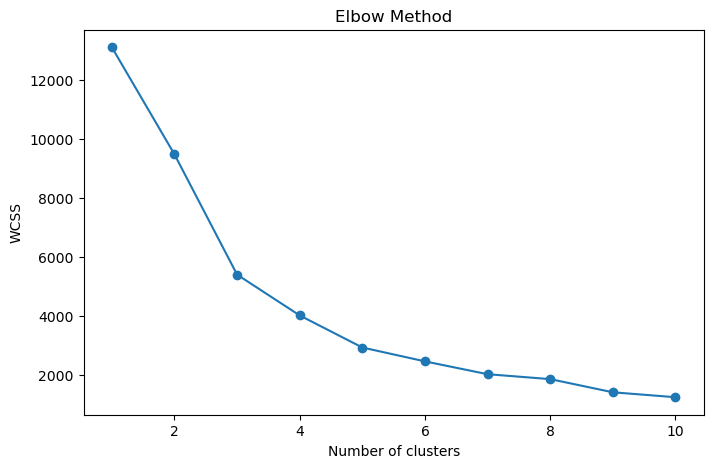

           CustomerID     Recency    Frequency       Monetary
Cluster                                                      
0        15283.879763   42.382392    73.976675    1288.344525
1        15354.049533  248.777570    27.699065     466.779552
2        14899.000000    1.000000  5914.000000   64776.602500
3        15353.800000    8.000000  1013.400000  192103.854000
4        15264.510040   11.285141   495.112450   10679.780241


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime

df2 = df2.dropna(subset=['CustomerID'])

# Step 3: Feature engineering
# Convert InvoiceDate to datetime
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Create TotalSpent feature
df2['TotalSpent'] = df2['Quantity'] * df2['UnitPrice']

# Calculate Recency, Frequency, and Monetary value per CustomerID
snapshot_date = max(df2['InvoiceDate'])  # Assuming the last date as the reference point
rfm = df2.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSpent': 'sum',  # Monetary value
}).reset_index()

# Renaming columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# optimal number of clusters is 4 based on the elbow curve
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)

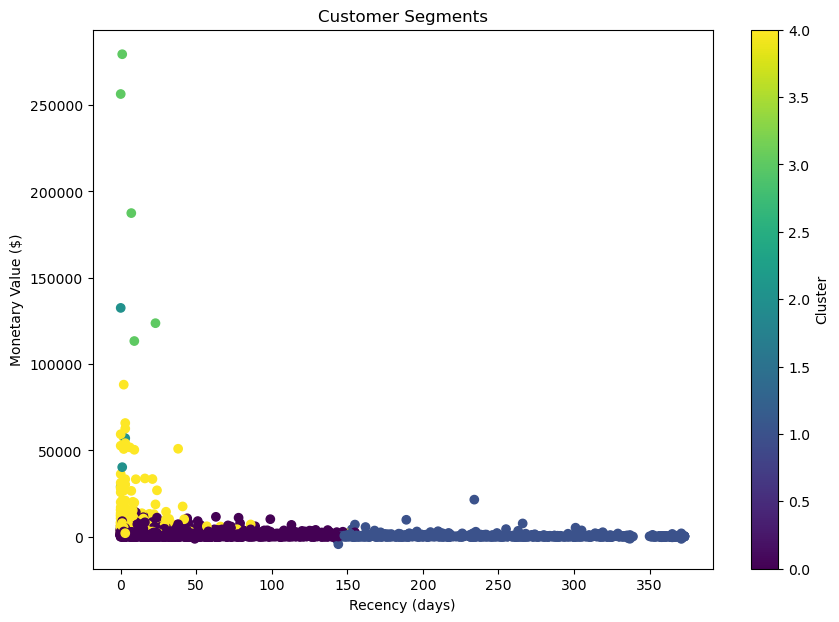

In [71]:
plt.figure(figsize=(10, 7))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segments')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value ($)')
plt.colorbar(label='Cluster')
plt.show()

# TASK 3

Explained Variance Ratio: [0.54669757 0.45330243]


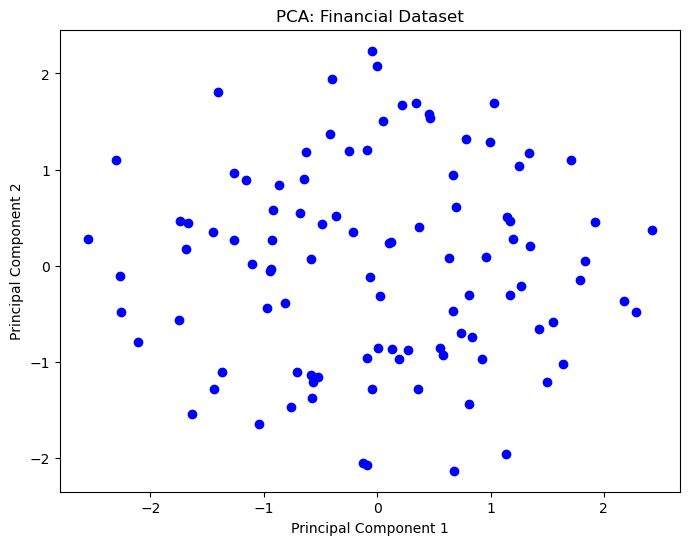

Principal Component 1 explains 54.67% of the variance.
Principal Component 2 explains 45.33% of the variance.


In [107]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'Income': np.random.randint(20000, 100000, 100),
    'Spending': np.random.randint(5000, 50000, 100),
    'Savings': np.random.randint(1000, 30000, 100),
    'Investments': np.random.randint(500, 15000, 100),
}

df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Extract eigenvalues (explained variance)
eigenvalues = pca.explained_variance_
total_variance = np.sum(eigenvalues)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / total_variance

# Display explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], color='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Financial Dataset')
plt.show()

# Insights
print(f"Principal Component 1 explains {explained_variance_ratio[0] * 100:.2f}% of the variance.")
print(f"Principal Component 2 explains {explained_variance_ratio[1] * 100:.2f}% of the variance.")


- **PC1** captures over half of the total variance in the dataset. This implies that the variables contributing to this component have a significant impact on the overall structure of the data. It's likely that factors like **Income** and **Spending might** have strong influence on this principal component, as they can tend to dominate financial behavior in real-world scenarios.

- Although **PC2** explains a slightly lower amount of variance compared to PC1, it still accounts for a substantial proportion(45%). This indicates that the second component captures a different set of patterns or relationships between features, such as Savings and Investments.

- With PCA successfully capturing the underlying structure of the data in just two components, we can now apply clustering algorithms on this 2D representation. This may reveal distinct customer segments with similar financial characteristics.

- **Recommendation:** clustering techniques can be used to categorize users based on their income, spending, savings, and investments patterns. For example, one cluster might represent high-income individuals with high spending but low savings, while another cluster could represent more conservative savers and investors.